In [24]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

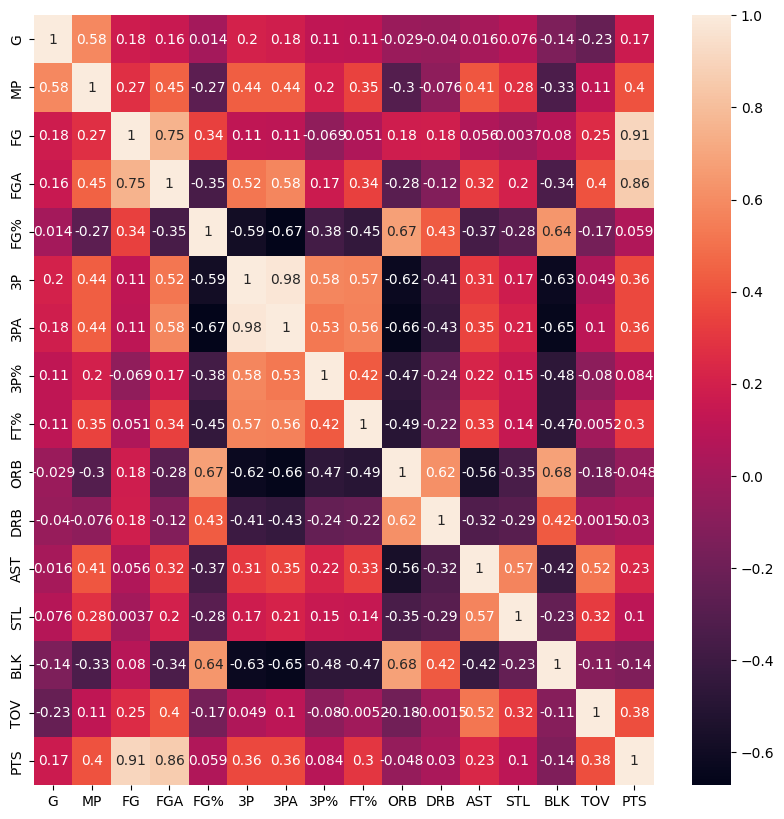

In [68]:
df = pd.read_csv('output.csv', header=1)

#Exploration
correlation = df[['G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]
plt.figure(figsize = (10, 10))
sns.heatmap(correlation.corr(), annot = True)

df = df.drop(['Player', 'Class', 'Season', 'Pos', 'School', 'Conf'], axis=1)

# df['FGA.1'] = pd.to_numeric(df['FGA.1'], errors='coerce')
# df = df.fillna(df.mean())

X = df.drop(['NBA WS', 'NBA MP'], axis=1)
y = df['NBA WS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=144)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=144)

MAE       1.899332
alphas    0.220000
Name: 22, dtype: float64

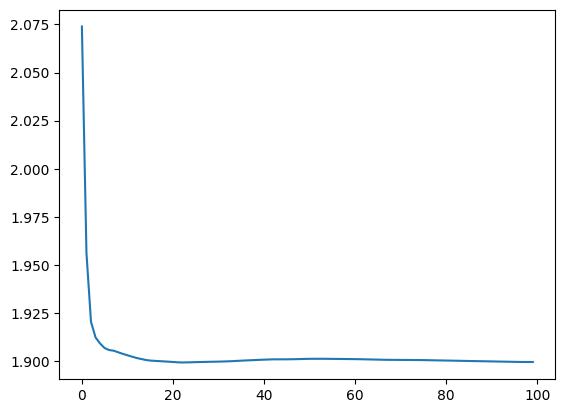

In [69]:
MAE = []
alphas = []
# Fit model and collect performance iteratively
for a in np.arange(0,1,.01):
    # Fit a Lasso model
    model = Lasso(alpha=a)
    cv_results = cross_validate(model, X, y, cv=5, scoring='neg_mean_absolute_error')

    # Calculate performance
    mae_avg = -cv_results['test_score'].mean()
    MAE.append(mae_avg)
    alphas.append(a)

MAE = pd.DataFrame(MAE)
MAE['alphas'] = pd.DataFrame(alphas)
MAE = MAE.rename(columns={0: 'MAE'})    
MAE['MAE'].plot(kind = 'line')

# Retrieving the row with the minimum value in column 'B'
MAE.iloc[MAE['MAE'].idxmin()]

In [74]:
lasso_reg = Lasso(alpha=0.22)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rss = mse * len(y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("RSS:", rss)


Mean Squared Error: 2.711803349855344
Mean Absolute Error: 1.427031414082356
R-squared: -0.19411042898297715
RSS: 84.06590384551566


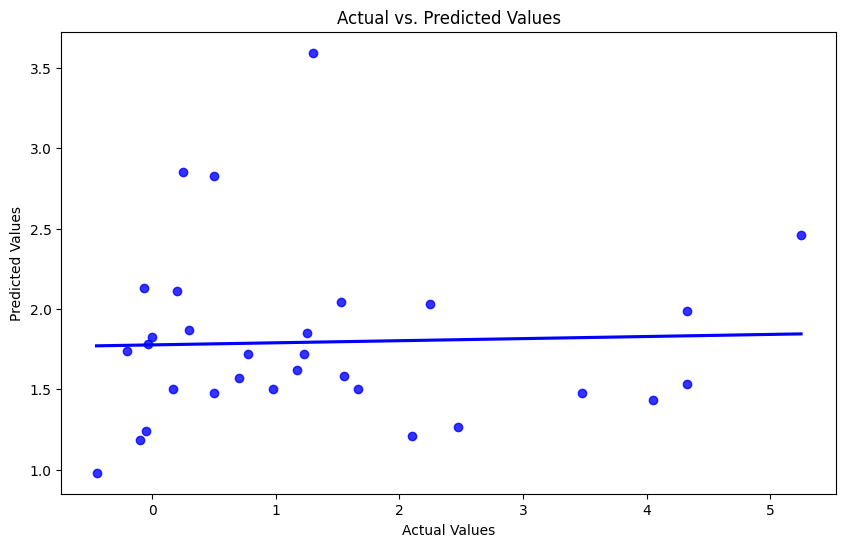

In [75]:
# Regression Plot: Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# plt.savefig('regression_plot_ridge.png')  
plt.show()
plt.close() 

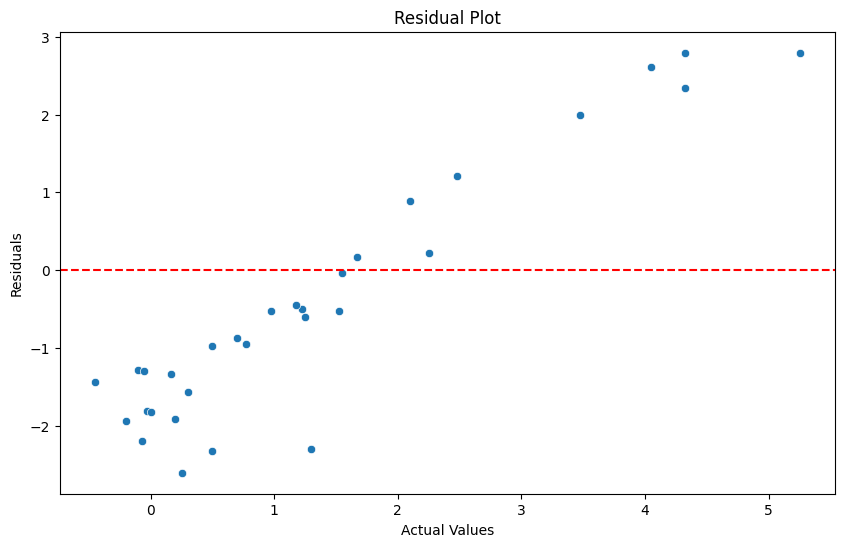

In [76]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
# plt.savefig('residual_plot_ridge.png') 
plt.show()
plt.close()  

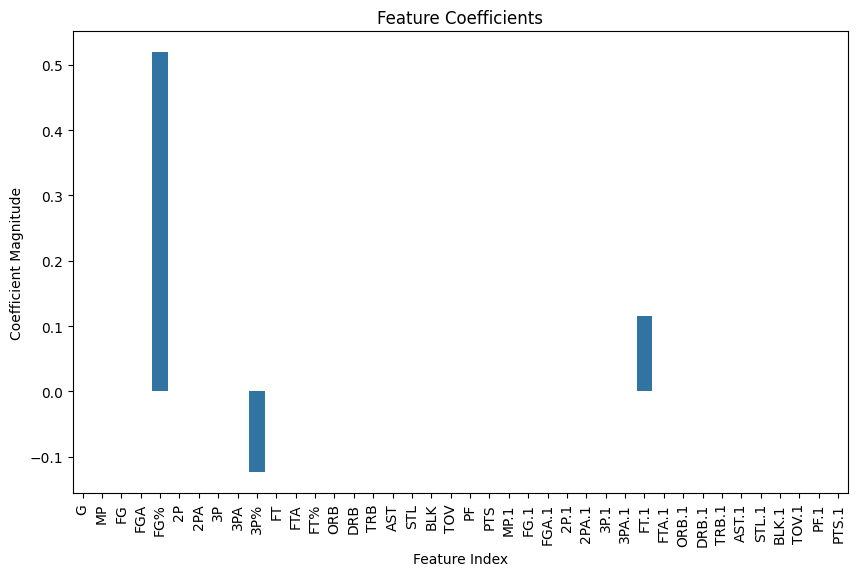

In [77]:
# Coefficient Plot
coefficients = lasso_reg.coef_
plt.figure(figsize=(10, 6))
# sns.barplot(x=np.arange(len(coefficients)), y=coefficients)
sns.barplot(x=X.columns, y=coefficients)
plt.xlabel('Feature Index')
plt.xticks(rotation=90) 
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Coefficients')
# plt.savefig('coefficient_plot_ridge.png') 
plt.show()
plt.close() 
